# Compound Charts

In [3]:
# This is for :-
# Layering
# Horizontal Concatenation & Vertical Concatenation
# Repeat Charts

In [33]:
import altair as alt
alt.renderers.enable('notebook')
from vega_datasets import data

## Layering

In [8]:
# Layering lets you put layer multiple marks on a single Chart.
# One common example is creating a plot with both points and lines representing the same data.

In [9]:
from vega_datasets import data
stocks = data.stocks()
stocks.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


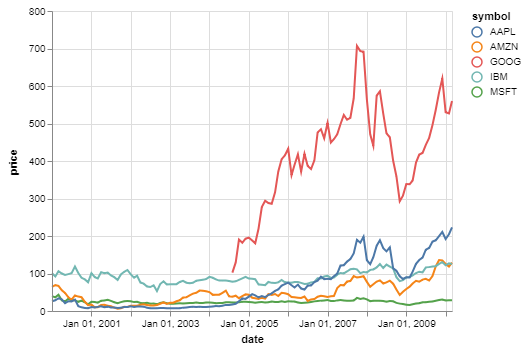

In [13]:
# simple line plot 
alt.Chart(stocks).mark_line().encode(
x='date:T',
    y='price:Q',
    color='symbol:N'
)

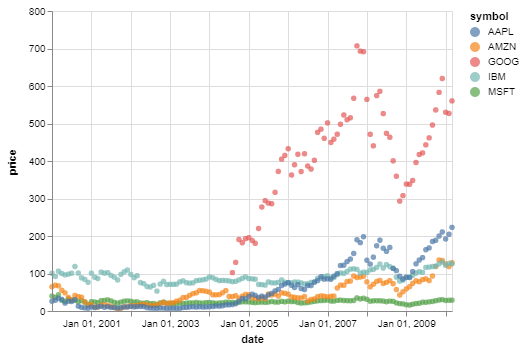

In [14]:
# same plot with a circle mark:
alt.Chart(stocks).mark_circle().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

### We can layer these two plots together using a + operator

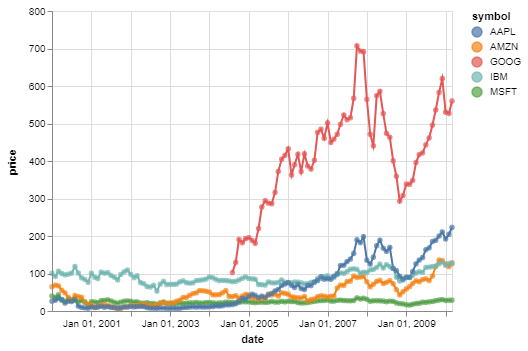

In [18]:
lines = alt.Chart(stocks).mark_line().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

points = alt.Chart(stocks).mark_circle().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N'
)

lines + points

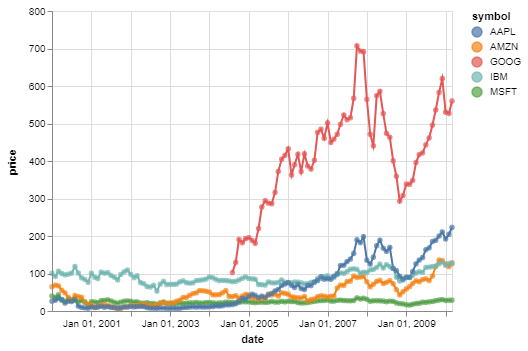

In [20]:
alt.layer(lines, points) #Also does the same thing  .. + is just a shortcut to the alt.layer() function,

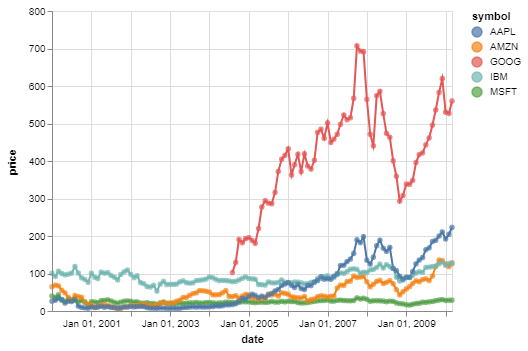

In [23]:
base=alt.Chart(stocks).encode(
 x='date:T',
    y='price:Q',
    color='symbol:N'
)
base.mark_line() + base.mark_circle()
# Different way to do the same thing in less line of codes.
# Here we create a base chart with the common elements, and add together two copies with just a single change:

# Horizontal Concatenation

##### concatenate horizontally using alt.hconcat, or equivalently the | operator:

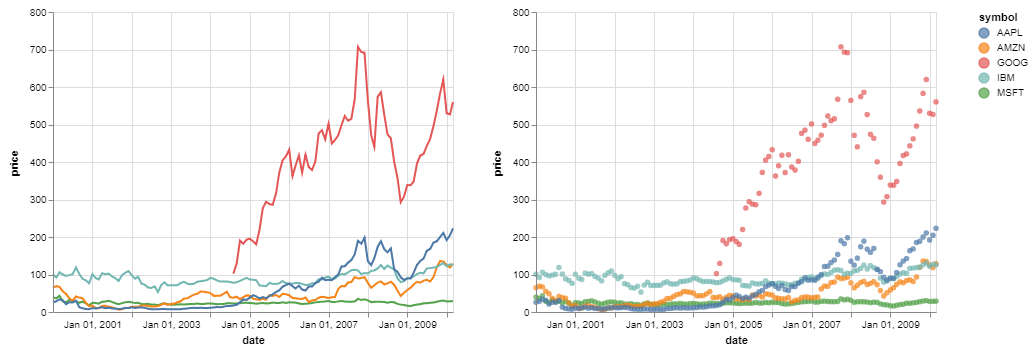

In [25]:
base.mark_line() | base.mark_circle() 

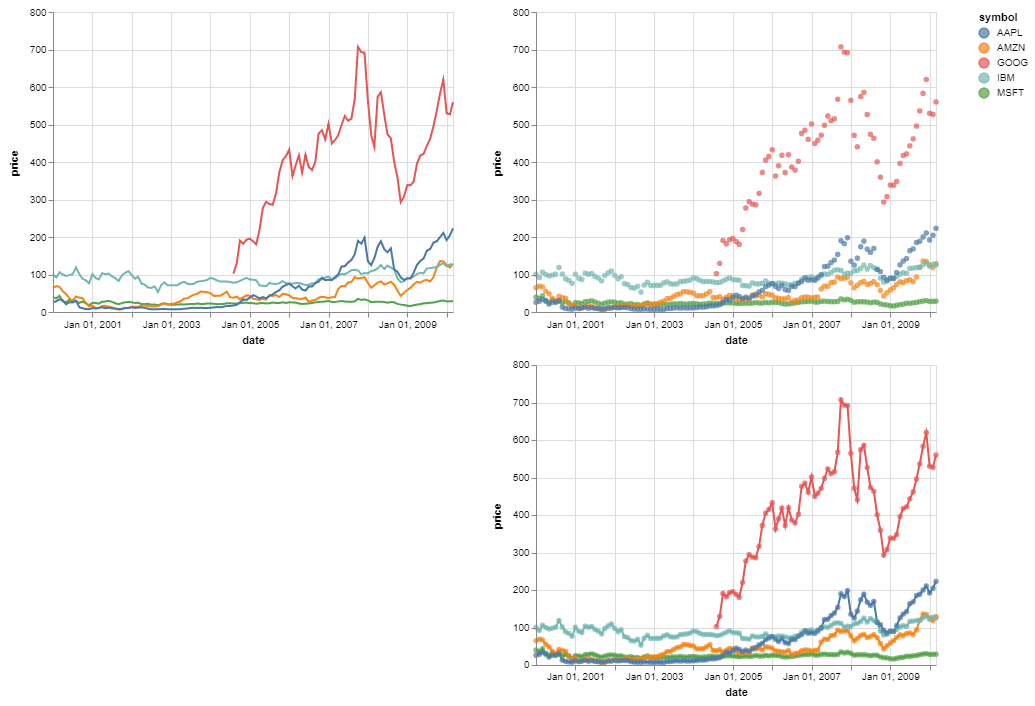

In [27]:
base.mark_line() | base.mark_circle() & base.mark_line() + base.mark_circle()
# & is for vertical concatenation or alt.vconcat() function

In [28]:
iris = data.iris()
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


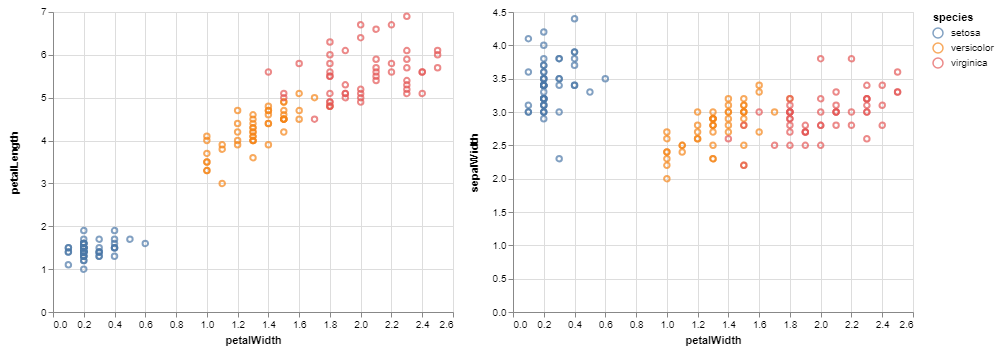

In [31]:
base = alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species'
)

base | base.encode(y='sepalWidth')

In [34]:
fields[::-1]

['sepalWidth', 'sepalLength', 'petalWidth', 'petalLength']

# Repeat Charts

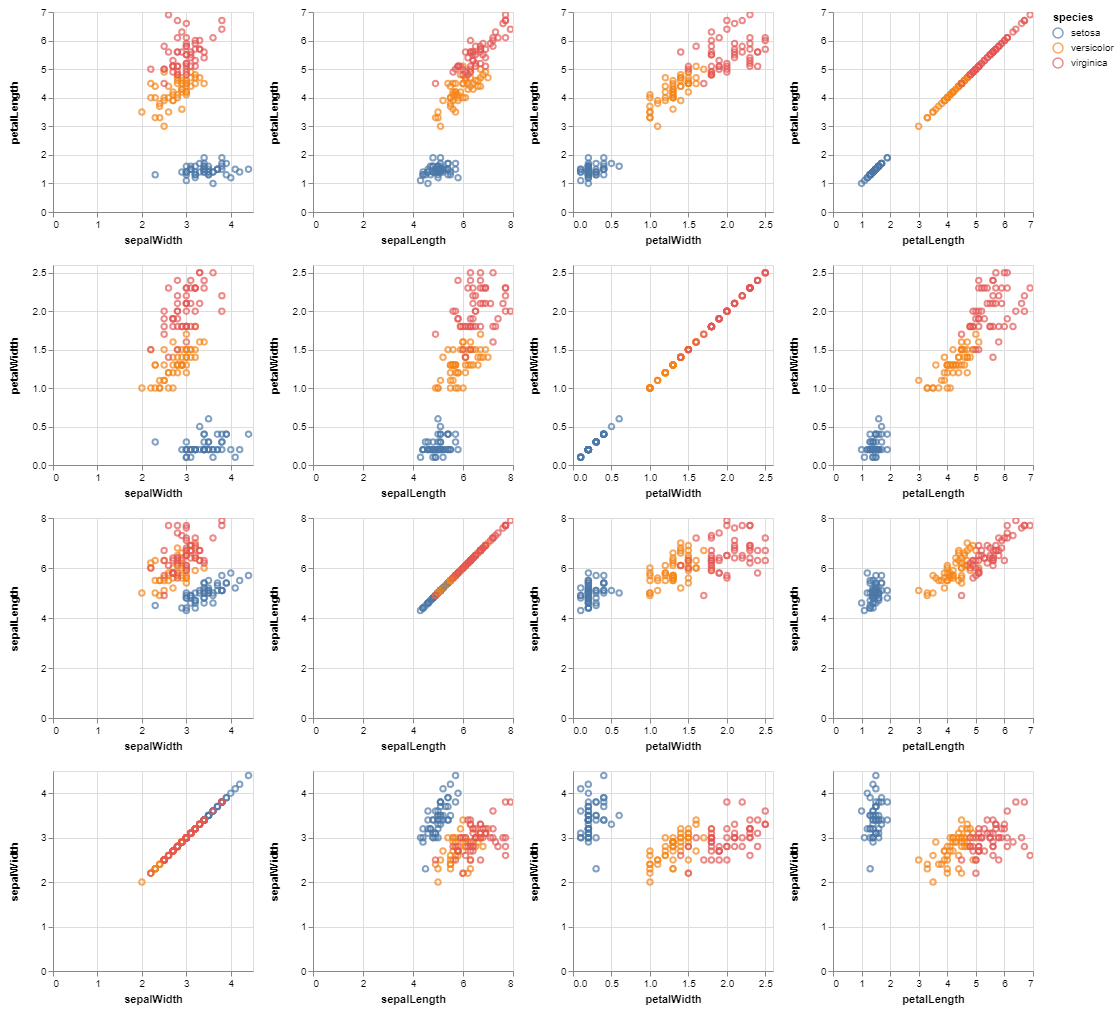

In [40]:
import altair as alt
from vega_datasets import data

iris = data.iris()

fields = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']

alt.Chart(iris).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='species'
).properties(
    width=200,
    height=200
).repeat(
    row=fields,
    column=fields[::-1]
).interactive()